In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
data = pd.read_csv('US_Accidents_Dec21_Cleaned.csv')
data

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day
2,5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,1.427,At Dela Palma Rd - Accident.,State Route 32,...,False,False,False,False,False,True,Day,Day,Day,Day
3,6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,0.227,At OH-4/Exit 54 - Accident.,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day
4,7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,...,False,False,True,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80035,97227,A-97228,2,2016-04-05 07:15:12,2016-04-05 13:15:12,42.263710,-71.571140,5.072,Between I-495/Exit 11 and RT-9/Exit 12 - Accid...,I-90 E,...,False,False,False,False,False,False,Day,Day,Day,Day
80036,97228,A-97229,2,2016-04-05 07:21:33,2016-04-05 13:21:33,40.639470,-74.879800,0.379,At US-22/Exit 18 - Accident.,I-78 E,...,False,False,False,False,False,False,Day,Day,Day,Day
80037,97229,A-97230,2,2016-04-05 07:42:52,2016-04-05 13:42:52,40.918080,-74.087680,1.667,Between Paramus Rd/Exit 160 and RT-17/Exit 163...,Garden State Pkwy N,...,False,False,False,False,False,False,Day,Day,Day,Day
80038,97230,A-97231,2,2016-04-05 07:53:12,2016-04-05 13:53:12,40.529170,-74.339790,1.785,Between RT-440 and RT-27/Exit 2 - Accident.,I-287 N,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Data Preprocessing
# Check for null values
null_values = data.isnull().sum()

In [4]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [5]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80040 entries, 0 to 80039
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             80040 non-null  int64  
 1   ID                     80040 non-null  object 
 2   Severity               80040 non-null  int64  
 3   Start_Time             80040 non-null  object 
 4   End_Time               80040 non-null  object 
 5   Start_Lat              80040 non-null  float64
 6   Start_Lng              80040 non-null  float64
 7   Distance(mi)           80040 non-null  float64
 8   Description            80040 non-null  object 
 9   Street                 80039 non-null  object 
 10  Side                   80039 non-null  object 
 11  City                   80039 non-null  object 
 12  County                 80039 non-null  object 
 13  State                  80039 non-null  object 
 14  Zipcode                80039 non-null  object 
 15  Co

In [6]:
# Descriptive statistics
summary_stats = data.describe()
summary_stats

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,80040.000000,80040.000000,80040.000000,80040.000000,80040.000000,80039.000000,80039.000000,80039.000000,80039.000000,80039.000000
mean,48309.393178,2.438193,36.894771,-89.981688,0.781435,64.150372,64.614251,30.014152,9.362734,8.991707
std,28061.043252,0.699081,5.125581,13.837589,1.923358,20.436033,20.409173,0.330264,2.853153,6.134658
min,0.000000,2.000000,25.129476,-123.526160,0.000000,-18.000000,4.000000,20.670000,0.000000,0.000000
25%,23929.750000,2.000000,33.190840,-95.952803,0.140000,51.100000,50.000000,29.910000,10.000000,5.800000
50%,47937.500000,2.000000,38.345660,-86.817490,0.400000,68.000000,65.000000,30.020000,10.000000,8.100000
75%,72638.250000,3.000000,41.207971,-80.322670,0.730000,80.100000,81.000000,30.140000,10.000000,11.500000
max,97231.000000,4.000000,48.564331,-68.499932,151.525000,129.200000,100.000000,30.920000,111.000000,822.800000


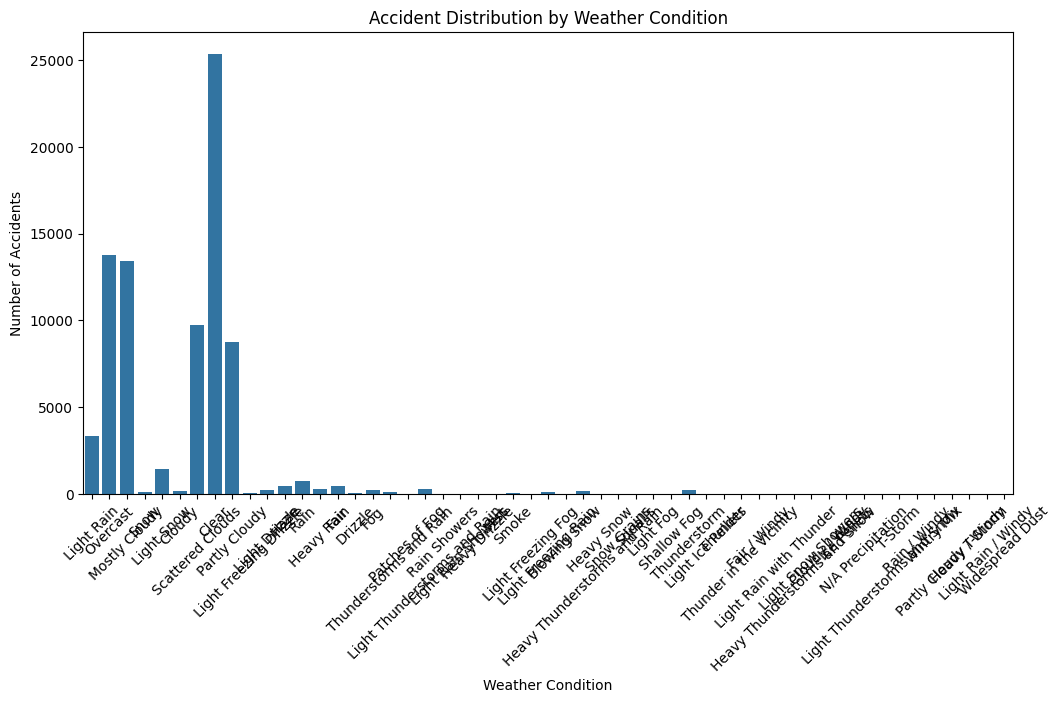

In [8]:
# Visualize accident distribution by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Condition', data=data)
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Weather Condition')
plt.show()

**# Calculate correlations**

**# Note: Correlation are more suitable for numerical data, so we'll skip this for categorical fields.**

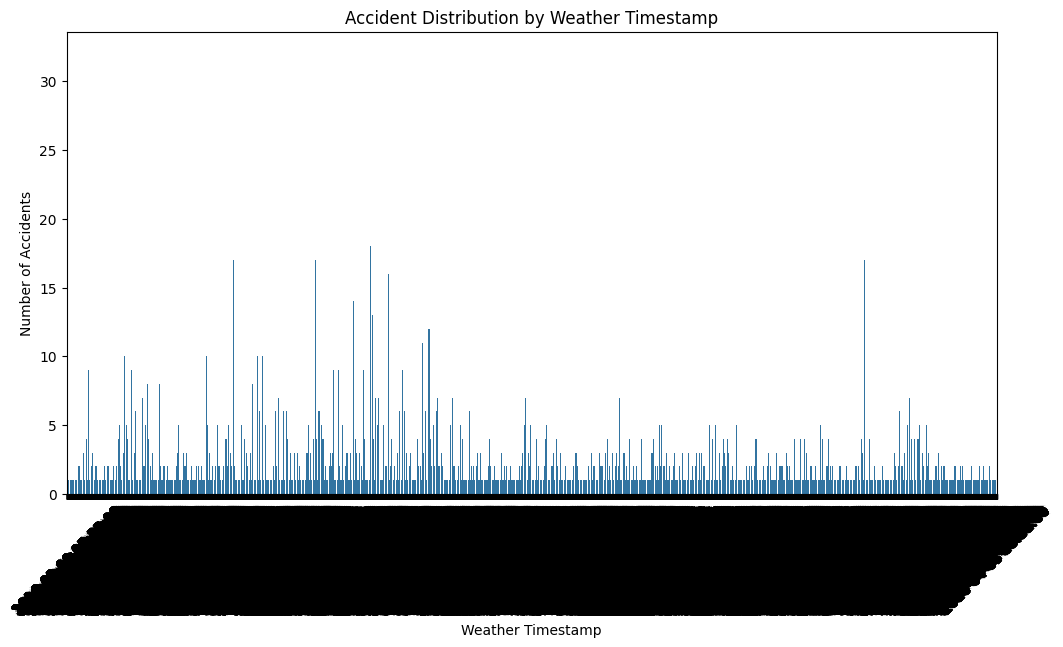

In [9]:
# Visualize accident distribution by Weather_Timestamp
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Timestamp', data=data)
plt.xticks(rotation=45)
plt.xlabel('Weather Timestamp')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Weather Timestamp')
plt.show()

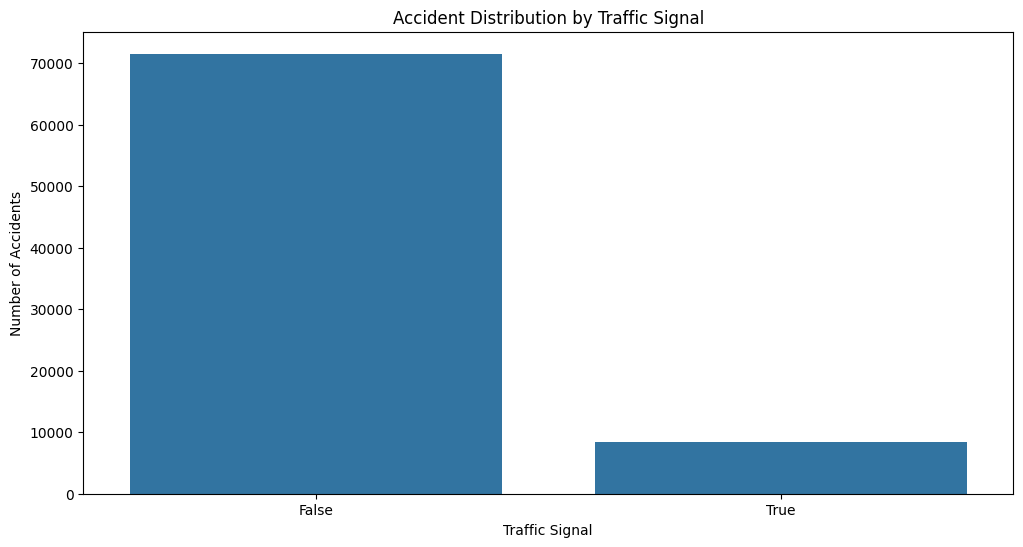

In [10]:
# Visualize accidentdistribution by a Traffic_Signal
plt.figure(figsize=(12, 6))
sns.countplot(x='Traffic_Signal', data=data)
plt.xlabel('Traffic Signal')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Traffic Signal')
plt.show()

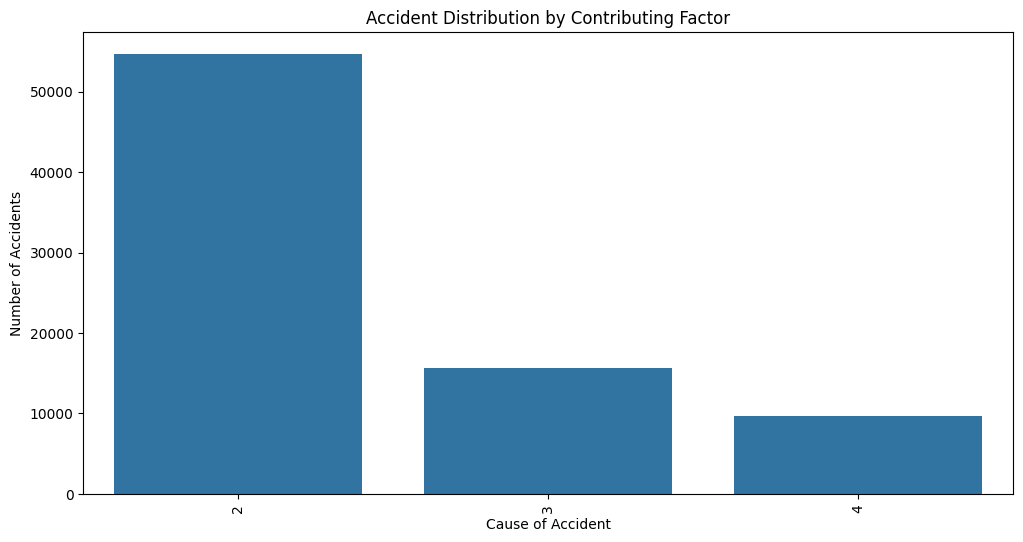

In [11]:
# Contributing factors analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Severity', data=data)
plt.xticks(rotation=90)
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Contributing Factor')
plt.show()